# Multiple Linear Regression using the California Housing dataset

Here's a brief overview of the entire file:

1. **Imports:** The script starts by importing necessary libraries, including `numpy`, `pandas`, and `plotly.graph_objects` for data manipulation and visualization, and the required modules from `sklearn` for dataset loading, model creation, and evaluation.

2. **Dataset Loading:** The California Housing dataset is loaded using the `fetch_california_housing` function from `sklearn.datasets`. The data is stored in a pandas DataFrame for further processing.

3. **Data Preprocessing:** The dataset is split into features (`X`) and target (`y`). Then, the dataset is split into training and testing sets using the `train_test_split` function. This prepares the data for model training and evaluation.

4. **Model Creation:** A Linear Regression model is initialized using the `LinearRegression` class from `sklearn`. This will be used to perform the multiple linear regression.

5. **Model Training:** The model is trained using the training data by calling the `fit` method and passing the features and target.

6. **Predictions:** The trained model is used to make predictions on the testing data using the `predict` method. Predicted values (`y_pred`) are obtained.

7. **3D Scatter Plot:** The script uses the `plotly.graph_objects` library to create a 3D scatter plot. The actual and predicted values are plotted against the AveRooms and AveBedrms features. This plot visually represents the relationship between these features and the target value.

8. **Layout and Presentation:** The layout of the 3D scatter plot is customized using various options like axis titles and legend settings to enhance visualization.

9. **Plot Display:** The final 3D scatter plot is displayed using the `show` method of the Plotly figure object.

This script provides an illustrative example of Multiple Linear Regression using real-world data, along with an interactive 3D scatter plot to visualize the predicted values based on specific features.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting module
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [28]:
# Load the California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [29]:
# Data Preprocessing
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create a Linear Regression model
model = LinearRegression()
model

LinearRegression()

In [10]:

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [30]:

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [31]:

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.555891598695244
R-squared: 0.5757877060324511


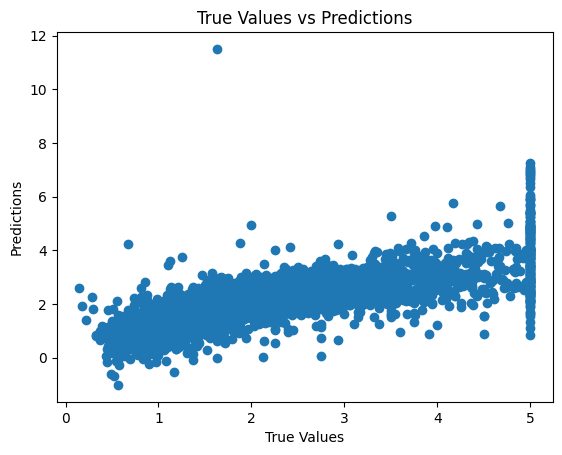

In [13]:
# Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()


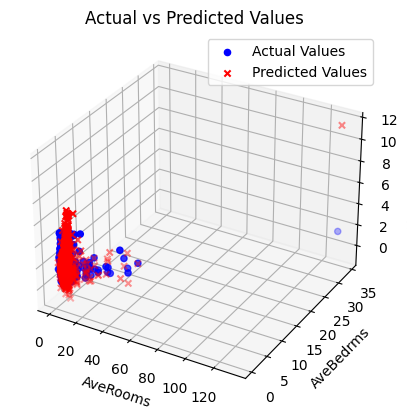

In [14]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Plot the actual data
ax.scatter(X_test['AveRooms'], X_test['AveBedrms'], y_test, c='blue', marker='o', label='Actual Values')

# Plot the predicted values
ax.scatter(X_test['AveRooms'], X_test['AveBedrms'], y_pred, c='red', marker='x', label='Predicted Values')

ax.set_xlabel('AveRooms')
ax.set_ylabel('AveBedrms')
ax.set_zlabel('MedHouseVal')

plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [27]:
import plotly.graph_objects as go

# Create a 3D scatter plot using Plotly
fig = go.Figure()

# Add the actual values as a scatter plot
fig.add_trace(go.Scatter3d(x=X_test['AveRooms'], y=X_test['AveBedrms'], z=y_test,
                           mode='markers', name='Actual Values'))


# Add the predicted values as a scatter plot
fig.add_trace(go.Scatter3d(x=X_test['AveRooms'], y=X_test['AveBedrms'], z=y_pred,
                           mode='markers', name='Predicted Values'))

fig.update_layout(scene=dict(xaxis_title='AveRooms',
                             yaxis_title='AveBedrms',
                             zaxis_title='MedHouseVal'),
                  title='Actual vs Predicted Values (3D Scatter Plot)',
                  legend=dict(itemsizing='constant'),
                  showlegend=True)

# Show the plot
fig.show()

The code `sns.displot(y_pred - y_test, kind='kde')` generates a kernel density estimate (KDE) plot using Seaborn. It visualizes the distribution of residuals by subtracting the actual values (`y_test`) from the predicted values (`y_pred`). The resulting KDE plot helps to understand how prediction errors are distributed and provides insights into the model's performance.

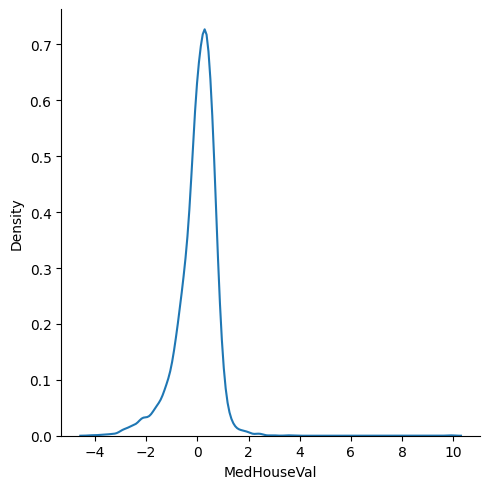

In [21]:
sns.displot(y_pred - y_test,kind='kde')